In [1]:
import os
import re
import glob

import h5py

import numpy as np

from scipy import signal

import skimage

import matplotlib.pyplot as plt

In [2]:
# Save progress
HISTORY_FILEPATH = r"\\10.254.8.27\JILAB3-Quota\Jian\Backup\JupyterNotebookBackup\JEDI2P_NeuropilTrace_Extraction.py"
LAST_SAVE_TIME = 0
SAVE_INTERVAL_S = 15*60
def SAVE_PROGRESS(dst_file_path):
    global LAST_SAVE_TIME, SAVE_INTERVAL_S
    import time
    cur_time = time.time()
    if (cur_time - LAST_SAVE_TIME) < SAVE_INTERVAL_S:
        print(f"Time since last sync = {(cur_time - LAST_SAVE_TIME):0.2f} s" )
        return
    LAST_SAVE_TIME = cur_time
    try:
        from datetime import datetime
        dst_dir_path, dst_file_name = os.path.split(dst_file_path)
        dst_file_name = os.path.splitext(dst_file_name)[0] + "_" + datetime.today().strftime('%Y-%m-%d') + os.path.splitext(dst_file_name)[1]
        dst_file_path = os.path.join(dst_dir_path, dst_file_name)
        if not os.path.isdir(dst_dir_path):
            os.makedirs(dst_dir_path)
        if os.path.exists(dst_file_path):
            os.remove(dst_file_path)
        %history -t -g -f $dst_file_path
        dst_notebook_path = os.path.splitext(dst_file_path)[0] + ".ipynb"
        %notebook $dst_notebook_path
        print("Progress saved to: " + dst_file_path)
    except Exception as e:
        print("Progress sync failed, error: ",e)

In [3]:
def generate_grid_2dmask(image_shape, grid_shape):
    from collections.abc import Iterable
    
    assert isinstance(image_shape, Iterable)
    assert isinstance(grid_shape, Iterable)
    assert len(grid_shape) == 2
    assert len(image_shape) == 2

    if not isinstance(image_shape, np.ndarray):
        image_shape = np.array(image_shape)

    if not isinstance(grid_shape, np.ndarray):
        grid_shape = np.array(grid_shape)

    masks = np.full(tuple(grid_shape) + tuple(image_shape), False)
    grid_spacings =  np.ceil(image_shape/grid_shape).astype(int)  

    print(grid_spacings)

    for i_h in range(grid_shape[0]):
        cur_h_start = i_h * grid_spacings[0]
        cur_h_end = min( (i_h + 1) * grid_spacings[0], image_shape[0])
        for i_w in range(grid_shape[1]):
            cur_w_start = i_w * grid_spacings[1]
            cur_w_end = min( (i_w + 1) * grid_spacings[1], image_shape[1])
            masks[i_h, i_w, cur_h_start:cur_h_end, cur_w_start:cur_w_end] = True

    return masks

SAVE_PROGRESS(HISTORY_FILEPATH)  

Progress saved to: \\10.254.8.27\JILAB3-Quota\Jian\Backup\JupyterNotebookBackup\JEDI2P_NeuropilTrace_Extraction_2024-05-24.py


In [4]:
def bw_lp_filtering(order, cutoff, fs, src_traces):
    b, a = signal.butter(order, cutoff, "lp", fs = fs, output = "ba")
    dst_traces = signal.filtfilt(b, a, src_traces, method="gust", axis = -1)
    return dst_traces

def bw_hp_filtering(order, cutoff, fs, src_traces):
    b, a = signal.butter(order, cutoff, "hp", fs = fs, output = "ba")
    dst_traces = signal.filtfilt(b, a, src_traces, method="gust", axis = -1)
    return dst_traces

SAVE_PROGRESS(HISTORY_FILEPATH)  

Time since last sync = 14.09 s


In [5]:
# acqusition configuration
time_per_frame_ms = 2.6 
ms_to_s = 1e-3
s_to_ms = 1e3

bw_order = 3
bw_cutoff = 1/3
fs = 1 * s_to_ms / time_per_frame_ms

SAVE_PROGRESS(HISTORY_FILEPATH)

Time since last sync = 14.10 s


In [30]:
src_root_dir_path = r"F:\2023-08-31\M375_JEDI2P\FOV01\Group03"
src_pkg_name_glob = "*_Pkg"
src_data_subdir_name = r"MotionReg" 
src_data_file_name = r"motion_reg.tif"

src_hand_draw_roi_path = r"F:\2023-08-31\M375_JEDI2P\FOV01\Group03\TemplateROIs\Masks.tif"

dst_root_dir_path = src_root_dir_path
dst_dir_name = "bkg_traces"
dst_data_subdir_name = "data"

SAVE_PROGRESS(HISTORY_FILEPATH)

Time since last sync = 438.47 s


In [31]:
# src_root_dir_path = r"F:\2023-08-31\M374_JEDI2P\FOV01\Group03"
# src_pkg_name_glob = "*_Pkg"
# src_data_subdir_name = r"MotionReg" 
# src_data_file_name = r"motion_reg.tif"

# src_hand_draw_roi_path = r"F:\2023-08-31\M374_JEDI2P\FOV01\Group03\TemplateROIs\Masks.tif"

# dst_root_dir_path = src_root_dir_path
# dst_dir_name = "bkg_traces"
# dst_data_subdir_name = "data"

# SAVE_PROGRESS(HISTORY_FILEPATH)

In [32]:
# src_root_dir_path = r"M:\2023-05-11\M347\FOV02\Group01"
# src_pkg_name_glob = "*_Pkg"
# src_data_subdir_name = r"MotionReg" 
# src_data_file_name = r"motion_reg.tif"

# src_hand_draw_roi_path = r"M:\2023-05-11\M347\FOV02\Group01\TemplateROIs\Masks.tif"

# dst_root_dir_path = src_root_dir_path
# dst_dir_name = "bkg_traces"
# dst_data_subdir_name = "data"

# SAVE_PROGRESS(HISTORY_FILEPATH)

In [33]:
# src_root_dir_path = r"J:\2023-10-10\M377_JEDI2P\FOV03\Group01"
# src_pkg_name_glob = "*_Pkg"
# src_data_subdir_name = r"MotionReg" 
# src_data_file_name = r"motion_reg.tif"

# src_hand_draw_roi_path = r"J:\2023-10-10\M377_JEDI2P\FOV03\Group01\TemplateROI\Masks.tif"

# dst_root_dir_path = src_root_dir_path
# dst_dir_name = "bkg_traces"
# dst_data_subdir_name = "data"

# SAVE_PROGRESS(HISTORY_FILEPATH)

(180, 500, 400)


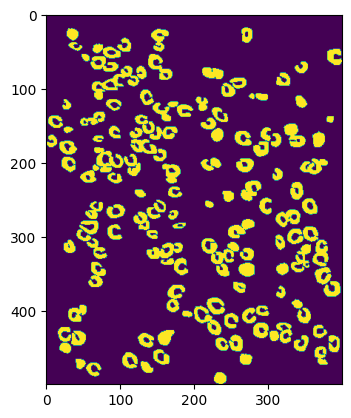

Time since last sync = 441.08 s


In [34]:
roi_mask = skimage.io.imread(src_hand_draw_roi_path)
roi_mask = roi_mask > 0

print(roi_mask.shape)

plt.figure()
plt.imshow(np.max(roi_mask, axis = 0))
plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH) 

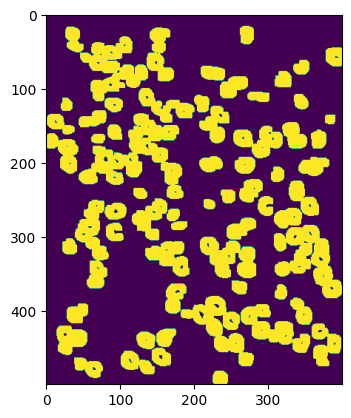

Time since last sync = 444.37 s


In [35]:
dilate_footprint = np.ones((5,5))

foreground_mask = np.max(roi_mask, axis = 0)

foreground_mask = skimage.morphology.binary_dilation(foreground_mask, footprint = dilate_footprint)

plt.figure()
plt.imshow(foreground_mask)
plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)  

[125 100]
(16, 500, 400)


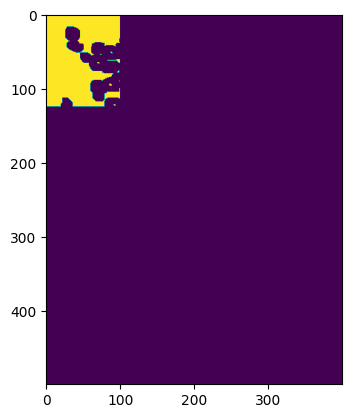

Time since last sync = 446.04 s


In [36]:
grid_shape = (4,4)

grid_mask = generate_grid_2dmask(roi_mask.shape[1:], grid_shape)

bkg_mask = grid_mask.reshape((-1,) + grid_mask.shape[-2:])
bkg_mask[:, foreground_mask] = False

print(bkg_mask.shape)

# check_mask_idx = 8
check_mask_idx = np.random.randint(0, bkg_mask.shape[0])

plt.figure()
plt.imshow(bkg_mask[check_mask_idx,:,:])
plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)  

In [37]:
src_data_file_path_glob = os.path.join(src_root_dir_path, src_pkg_name_glob, src_data_subdir_name, src_data_file_name)
src_data_file_paths = glob.glob(src_data_file_path_glob)
src_data_file_paths = np.array(src_data_file_paths)

print(src_data_file_paths.shape)

SAVE_PROGRESS(HISTORY_FILEPATH)  

(37,)
Time since last sync = 448.14 s


In [38]:
nof_trials = len(src_data_file_paths)
input_mask_stack = bkg_mask
nof_masks = input_mask_stack.shape[0]

trace_len = None

mean_traces = [None for _ in range(nof_trials)]
mean_F0s = [None for _ in range(nof_trials)]
mean_dFFs = [None for _ in range(nof_trials)]

for i_trial in range(nof_trials):
    cur_src_data_file_path = src_data_file_paths[i_trial]

    print("Processing " + cur_src_data_file_path)
    
    src_data_stack = skimage.io.imread(cur_src_data_file_path)
    
    input_data_stack = src_data_stack
    trace_len = input_data_stack.shape[0]

    mask_mean_traces = np.zeros((nof_masks,trace_len))
    for i_mask in range(nof_masks):
        cur_mask = input_mask_stack[i_mask,...]
        cur_trace = np.mean(input_data_stack[...,cur_mask], axis = -1)
        mask_mean_traces[i_mask,:] = cur_trace

    mask_mean_mean = np.mean(mask_mean_traces, axis = -1, keepdims = True)
    mask_mean_traces_centered = mask_mean_traces - mask_mean_mean 
    mask_mean_traces_centered = -mask_mean_traces_centered
    mask_mean_traces_hp = bw_hp_filtering(bw_order, bw_cutoff, fs, mask_mean_traces_centered)
    mask_mean_traces_lp = mask_mean_traces_centered - mask_mean_traces_hp
    mask_mean_F0s = np.abs(mask_mean_traces_lp + mask_mean_mean)
    mask_mean_dFFs = mask_mean_traces_hp/mask_mean_F0s

    mean_traces[i_trial] = mask_mean_traces
    mean_F0s[i_trial] = mask_mean_F0s
    mean_dFFs[i_trial] = mask_mean_dFFs

mean_traces = np.stack(mean_traces, axis = 0)
mean_F0s = np.stack(mean_F0s, axis = 0)
mean_dFFs = np.stack(mean_dFFs, axis = 0)

mean_traces = np.swapaxes(mean_traces, 0, 1)
mean_F0s = np.swapaxes(mean_F0s, 0, 1)
mean_dFFs = np.swapaxes(mean_dFFs, 0, 1)

print(mean_traces.shape)

SAVE_PROGRESS(HISTORY_FILEPATH)  

Processing F:\2023-08-31\M375_JEDI2P\FOV01\Group03\Olympus25X_M375_FOV01_Group03_TS_CH0_CHA_F0_Pkg\MotionReg\motion_reg.tif
Processing F:\2023-08-31\M375_JEDI2P\FOV01\Group03\Olympus25X_M375_FOV01_Group03_TS_CH0_CHA_F10_Pkg\MotionReg\motion_reg.tif
Processing F:\2023-08-31\M375_JEDI2P\FOV01\Group03\Olympus25X_M375_FOV01_Group03_TS_CH0_CHA_F11_Pkg\MotionReg\motion_reg.tif
Processing F:\2023-08-31\M375_JEDI2P\FOV01\Group03\Olympus25X_M375_FOV01_Group03_TS_CH0_CHA_F12_Pkg\MotionReg\motion_reg.tif
Processing F:\2023-08-31\M375_JEDI2P\FOV01\Group03\Olympus25X_M375_FOV01_Group03_TS_CH0_CHA_F13_Pkg\MotionReg\motion_reg.tif
Processing F:\2023-08-31\M375_JEDI2P\FOV01\Group03\Olympus25X_M375_FOV01_Group03_TS_CH0_CHA_F14_Pkg\MotionReg\motion_reg.tif
Processing F:\2023-08-31\M375_JEDI2P\FOV01\Group03\Olympus25X_M375_FOV01_Group03_TS_CH0_CHA_F15_Pkg\MotionReg\motion_reg.tif
Processing F:\2023-08-31\M375_JEDI2P\FOV01\Group03\Olympus25X_M375_FOV01_Group03_TS_CH0_CHA_F16_Pkg\MotionReg\motion_reg.tif
P

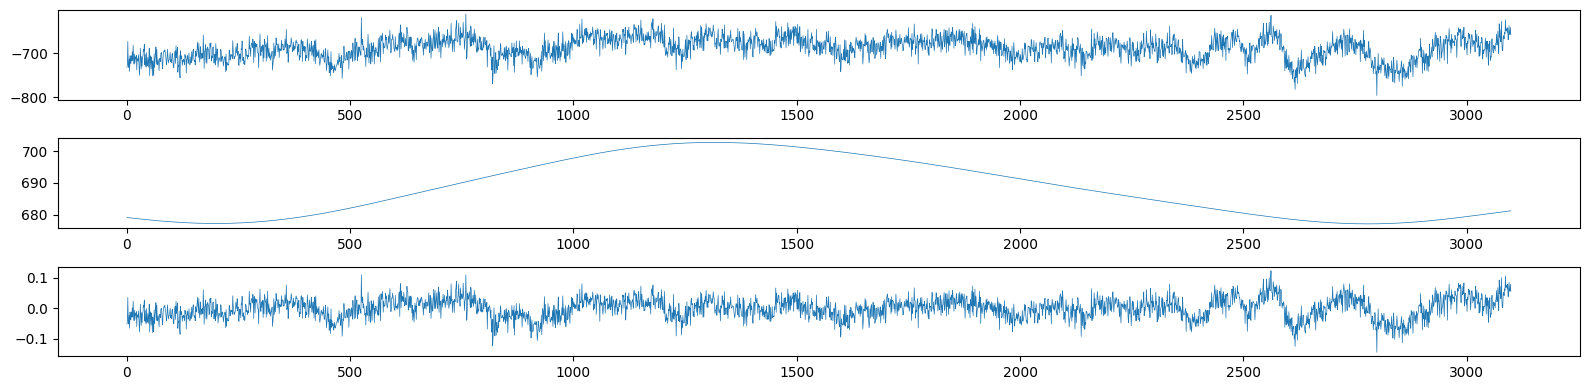

Progress saved to: \\10.254.8.27\JILAB3-Quota\Jian\Backup\JupyterNotebookBackup\JEDI2P_NeuropilTrace_Extraction_2024-05-28.py


In [39]:
check_i_trial = 1
check_idx = 8

plt.figure(figsize = (16,4))
plt.subplot(3,1,1)
plt.plot(-mean_traces[check_idx,check_i_trial,:], linewidth = 0.5)
plt.subplot(3,1,2)
plt.plot(mean_F0s[check_idx,check_i_trial,:],  linewidth = 0.5)
plt.subplot(3,1,3)
plt.plot(mean_dFFs[check_idx,check_i_trial,:],  linewidth = 0.5)
plt.tight_layout()
plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)  

In [40]:
dst_dir_path = os.path.join(dst_root_dir_path, dst_dir_name)
dst_data_subdir_path = os.path.join(dst_dir_path, dst_data_subdir_name)

if not os.path.isdir(dst_data_subdir_path):
    os.makedirs(dst_data_subdir_path)

print(dst_data_subdir_path)

SAVE_PROGRESS(HISTORY_FILEPATH)  

F:\2023-08-31\M375_JEDI2P\FOV01\Group03\bkg_traces\data
Time since last sync = 21.97 s


In [41]:
dst_data_file_name = "bkg_traces.hdf5"
dst_data_file_path = os.path.join(dst_data_subdir_path, dst_data_file_name)

with h5py.File(dst_data_file_path, "w") as hdf5_file:
    hdf5_file.create_dataset("time_per_frame_ms", data = time_per_frame_ms)
    hdf5_file.create_dataset("ms_to_s", data = ms_to_s)
    hdf5_file.create_dataset("s_to_ms", data = s_to_ms)
    hdf5_file.create_dataset("bw_order", data = bw_order)
    hdf5_file.create_dataset("bw_cutoff", data = bw_cutoff)
    hdf5_file.create_dataset("fs", data = fs)
    hdf5_file.create_dataset("roi_mask", data = roi_mask)
    hdf5_file.create_dataset("dilate_footprint", data = dilate_footprint)
    hdf5_file.create_dataset("foreground_mask", data = foreground_mask)
    hdf5_file.create_dataset("grid_shape", data = np.array(grid_shape))
    hdf5_file.create_dataset("grid_mask", data = grid_mask)
    hdf5_file.create_dataset("bkg_mask", data = bkg_mask)
    save_str_list = [tmp_str.encode("ascii","ignore") for tmp_str in src_data_file_paths]
    hdf5_file.create_dataset("src_data_file_paths", data = np.array(save_str_list))
    hdf5_file.create_dataset("nof_trials", data = nof_trials)
    hdf5_file.create_dataset("nof_masks", data = nof_masks)
    hdf5_file.create_dataset("trace_len", data = trace_len)
    hdf5_file.create_dataset("mean_traces", data = mean_traces)
    hdf5_file.create_dataset("mean_F0s", data = mean_F0s)
    hdf5_file.create_dataset("mean_dFFs", data = mean_dFFs)

print("result data file saved to: " + dst_data_file_path)

dst_notebook_file_name = "bkg_traces.ipynb"
dst_notebook_file_path = os.path.join(dst_data_subdir_path, dst_notebook_file_name)
%notebook $dst_notebook_file_path

SAVE_PROGRESS(HISTORY_FILEPATH)  

result data file saved to: F:\2023-08-31\M375_JEDI2P\FOV01\Group03\bkg_traces\data\bkg_traces.hdf5
Time since last sync = 23.15 s
